# PREPARACION DE DATOS

### Evaluacion de concordancia de predicción genómica y fenotipo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
merged_blees_cpos = pd.read_csv('output_dir/merged_df_blees_cpos_f99.tsv', sep = '\t')
merged_blees_cpos['input_file_name'] = merged_blees_cpos['input_file_name'].str.replace('KPN', '').str.replace('ECO', '')
smol_merged_blees_cpos = merged_blees_cpos[["input_file_name", "gene_symbol_modified", "Tool"]]
smol_merged_blees_cpos.head()

,input_file_name,gene_symbol_modified,Tool
0,A0101,CTX_M_15,ariba_CARD
1,A0101,KPC_3,ariba_CARD
2,A0101,SHV_28,ariba_CARD
3,A0101,TEM_90,ariba_CARD
4,A0102,OXA_48,ariba_CARD


In [3]:
tools = smol_merged_blees_cpos['Tool'].unique()

fixed = pd.DataFrame(index=pd.MultiIndex.from_product([smol_merged_blees_cpos['input_file_name'].unique(), tools], names=['input_file_name', 'Tool']), columns=['gene_symbol_modified'])
fixed['gene_symbol_modified'] = fixed['gene_symbol_modified'].apply(lambda x: [] if pd.isna(x) else x)
fixed.head()

gene_symbol_modified
input_file_name Tool                                
A0101           ariba_CARD                        []
                ariba_NCBI                        []
                ariba_RESFINDER                   []
                abricate_CARD                     []
                abricate_NCBI                     []

In [4]:
smol_merged_blees_cpos = smol_merged_blees_cpos.groupby(['input_file_name', 'Tool']).agg({'gene_symbol_modified': list})
smol_merged_blees_cpos.head()

for index in smol_merged_blees_cpos.index:
    fixed.loc[index, 'gene_symbol_modified'] = smol_merged_blees_cpos.loc[index, 'gene_symbol_modified']

smol_merged_blees_cpos = fixed.copy()
smol_merged_blees_cpos.head()

gene_symbol_modified
input_file_name Tool                                                
A0101           ariba_CARD         [CTX_M_15, KPC_3, SHV_28, TEM_90]
                ariba_NCBI                [CTX_M_15, SHV_28, TEM_90]
                ariba_RESFINDER            [CTX_M_15, KPC_3, SHV_28]
                abricate_CARD    [CTX_M_15, KPC_3, SHV_106, TEM_122]
                abricate_NCBI      [CTX_M_15, KPC_3, SHV_106, TEM_1]

In [5]:
merged_blees_cpos.shape

(1972, 39)

In [6]:

gene_resistance_equivalence = pd.read_csv('antibiotics/expected_resistance.csv')

gene_resistance_equivalence = gene_resistance_equivalence.rename(columns={'GEN': 'gene_symbol_modified'}).set_index('gene_symbol_modified')
gene_resistance_equivalence.head()

,Imipenem,Meropenem,Ertapenem,Ceftazidima,Cefotaxima,Cefepime,Amoxi-clav,Ceftolozano-tazo,Piperacilina-tazo,Ceftazidima-avi,Meropenem-vabor,Imipenem-releb
gene_symbol_modified,,,,,,,,,,,,
CTX_M_15,S,S,S,R,R,R,S,S,S,S,S,S
KPC_3,R,R,R,R,R,R,R,R,R,S,S,S
SHV_28,S,S,S,R,R,R,S,S,S,S,S,S
TEM_90,S,S,S,R,R,R,S,S,S,S,S,S
OXA_48,R,R,R,R,R,R,R,R,R,S,S,S


In [7]:
resistance_dict = {
    gene: gene_resistance_equivalence.columns[gene_resistance_equivalence.loc[gene] == 'R'].tolist()
    for gene in gene_resistance_equivalence.index
}

In [8]:
columns = gene_resistance_equivalence.columns
for column in columns:
    expected_column = f'{column}_expected'
    smol_merged_blees_cpos[expected_column] = "S"
smol_merged_blees_cpos.head()

gene_symbol_modified  \
input_file_name Tool                                                   
A0101           ariba_CARD         [CTX_M_15, KPC_3, SHV_28, TEM_90]   
                ariba_NCBI                [CTX_M_15, SHV_28, TEM_90]   
                ariba_RESFINDER            [CTX_M_15, KPC_3, SHV_28]   
                abricate_CARD    [CTX_M_15, KPC_3, SHV_106, TEM_122]   
                abricate_NCBI      [CTX_M_15, KPC_3, SHV_106, TEM_1]   

                                Imipenem_expected Meropenem_expected  \
input_file_name Tool                                                   
A0101           ariba_CARD                      S                  S   
                ariba_NCBI                      S                  S   
                ariba_RESFINDER                 S                  S   
                abricate_CARD                   S                  S   
                abricate_NCBI                   S                  S   

                                Ertapenem_expected Ceftazidima_expected  \
input_file_name Tool                                                      
A0101           ariba_CARD                       S                    S   
                ariba_NCBI                       S                    S   
                ariba_RESFINDER                  S                    S   
                abricate_CARD                    S                    S   
                abricate_NCBI                    S                    S   

                                Cefotaxima_expected Cefepime_expected  \
input_file_name Tool                                                    
A0101           ariba_CARD                        S                 S   
                ariba_NCBI                        S                 S   
                ariba_RESFINDER                   S                 S   
                abricate_CARD                     S                 S   
                abricate_NCBI                     S                 S   

                                Amoxi-clav_expected Ceftolozano-tazo_expected  \
input_file_name Tool                                                            
A0101           ariba_CARD                        S                         S   
                ariba_NCBI                        S                         S   
                ariba_RESFINDER                   S                         S   
                abricate_CARD                     S                         S   
                abricate_NCBI                     S                         S   

                                Piperacilina-tazo_expected  \
input_file_name Tool                                         
A0101           ariba_CARD                               S   
                ariba_NCBI                               S   
                ariba_RESFINDER                          S   
                abricate_CARD                            S   
                abricate_NCBI                            S   

                                Ceftazidima-avi_expected  \
input_file_name Tool                                       
A0101           ariba_CARD                             S   
                ariba_NCBI                             S   
                ariba_RESFINDER                        S   
                abricate_CARD                          S   
                abricate_NCBI                          S   

                                Meropenem-vabor_expected  \
input_file_name Tool                                       
A0101           ariba_CARD                             S   
                ariba_NCBI                             S   
                ariba_RESFINDER                        S   
                abricate_CARD                          S   
                abricate_NCBI                          S   

                                Imipenem-releb_expected  
input_file_name Tool                                     
A0101           ariba_CARD             

In [9]:
def get_antibiotic_resistance(genes_of_interest: list[str], resistance_dict: dict[str, list[str]]) -> list[str]:
    combined_antibiotics = set()

    for gene in genes_of_interest:
        if gene in resistance_dict:
            combined_antibiotics.update(resistance_dict[gene])

    return list(combined_antibiotics)

In [10]:
# For each sample, get the list of genes and the list of antibiotics that the genes confer resistance to
for sample in smol_merged_blees_cpos.index:
    genes = smol_merged_blees_cpos.loc[sample, 'gene_symbol_modified']
    antibiotics = get_antibiotic_resistance(genes, resistance_dict)
    
    for antibiotic in antibiotics:
        expected_column = f'{antibiotic}_expected'
        smol_merged_blees_cpos.loc[sample, expected_column] = 'R'
smol_merged_blees_cpos.head()

gene_symbol_modified  \
input_file_name Tool                                                   
A0101           ariba_CARD         [CTX_M_15, KPC_3, SHV_28, TEM_90]   
                ariba_NCBI                [CTX_M_15, SHV_28, TEM_90]   
                ariba_RESFINDER            [CTX_M_15, KPC_3, SHV_28]   
                abricate_CARD    [CTX_M_15, KPC_3, SHV_106, TEM_122]   
                abricate_NCBI      [CTX_M_15, KPC_3, SHV_106, TEM_1]   

                                Imipenem_expected Meropenem_expected  \
input_file_name Tool                                                   
A0101           ariba_CARD                      R                  R   
                ariba_NCBI                      S                  S   
                ariba_RESFINDER                 R                  R   
                abricate_CARD                   R                  R   
                abricate_NCBI                   R                  R   

                                Ertapenem_expected Ceftazidima_expected  \
input_file_name Tool                                                      
A0101           ariba_CARD                       R                    R   
                ariba_NCBI                       S                    R   
                ariba_RESFINDER                  R                    R   
                abricate_CARD                    R                    R   
                abricate_NCBI                    R                    R   

                                Cefotaxima_expected Cefepime_expected  \
input_file_name Tool                                                    
A0101           ariba_CARD                        R                 R   
                ariba_NCBI                        R                 R   
                ariba_RESFINDER                   R                 R   
                abricate_CARD                     R                 R   
                abricate_NCBI                     R                 R   

                                Amoxi-clav_expected Ceftolozano-tazo_expected  \
input_file_name Tool                                                            
A0101           ariba_CARD                        R                         R   
                ariba_NCBI                        S                         S   
                ariba_RESFINDER                   R                         R   
                abricate_CARD                     R                         R   
                abricate_NCBI                     R                         R   

                                Piperacilina-tazo_expected  \
input_file_name Tool                                         
A0101           ariba_CARD                               R   
                ariba_NCBI                               S   
                ariba_RESFINDER                          R   
                abricate_CARD                            R   
                abricate_NCBI                            R   

                                Ceftazidima-avi_expected  \
input_file_name Tool                                       
A0101           ariba_CARD                             S   
                ariba_NCBI                             S   
                ariba_RESFINDER                        S   
                abricate_CARD                          S   
                abricate_NCBI                          S   

                                Meropenem-vabor_expected  \
input_file_name Tool                                       
A0101           ariba_CARD                             S   
                ariba_NCBI                             S   
                ariba_RESFINDER                        S   
                abricate_CARD                          S   
                abricate_NCBI                          S   

                                Imipenem-releb_expected  
input_file_name Tool                                     
A0101           ariba_CARD             

In [11]:
smol_merged_blees_cpos.shape

(656, 13)

In [15]:
# open with pandas the observed resistance equivalence csv file
observed_resistance = pd.read_csv('antibiotics/observed_resistance.csv')
observed_resistance = observed_resistance.rename(columns={'Cepa': 'input_file_name'}).set_index('input_file_name')

# Filter columns to only keep the ones that are present in the observed resistance dataframe
observed_resistance = observed_resistance[[column for column in observed_resistance.columns if column in gene_resistance_equivalence.columns]]

# Merge the observed resistance dataframe with on the previously existing columns on smol_merged_blees_cpos
observed_resistance.columns = [f'{column}_observed' for column in observed_resistance.columns]
combined = smol_merged_blees_cpos.merge(observed_resistance, left_on="input_file_name", right_index=True)
combined.head()

gene_symbol_modified  \
input_file_name Tool                                                   
A0101           ariba_CARD         [CTX_M_15, KPC_3, SHV_28, TEM_90]   
                ariba_NCBI                [CTX_M_15, SHV_28, TEM_90]   
                ariba_RESFINDER            [CTX_M_15, KPC_3, SHV_28]   
                abricate_CARD    [CTX_M_15, KPC_3, SHV_106, TEM_122]   
                abricate_NCBI      [CTX_M_15, KPC_3, SHV_106, TEM_1]   

                                Imipenem_expected Meropenem_expected  \
input_file_name Tool                                                   
A0101           ariba_CARD                      R                  R   
                ariba_NCBI                      S                  S   
                ariba_RESFINDER                 R                  R   
                abricate_CARD                   R                  R   
                abricate_NCBI                   R                  R   

                                Ertapenem_expected Ceftazidima_expected  \
input_file_name Tool                                                      
A0101           ariba_CARD                       R                    R   
                ariba_NCBI                       S                    R   
                ariba_RESFINDER                  R                    R   
                abricate_CARD                    R                    R   
                abricate_NCBI                    R                    R   

                                Cefotaxima_expected Cefepime_expected  \
input_file_name Tool                                                    
A0101           ariba_CARD                        R                 R   
                ariba_NCBI                        R                 R   
                ariba_RESFINDER                   R                 R   
                abricate_CARD                     R                 R   
                abricate_NCBI                     R                 R   

                                Amoxi-clav_expected Ceftolozano-tazo_expected  \
input_file_name Tool                                                            
A0101           ariba_CARD                        R                         R   
                ariba_NCBI                        S                         S   
                ariba_RESFINDER                   R                         R   
                abricate_CARD                     R                         R   
                abricate_NCBI                     R                         R   

                                Piperacilina-tazo_expected  ...  \
input_file_name Tool                                        ...   
A0101           ariba_CARD                               R  ...   
                ariba_NCBI                               S  ...   
                ariba_RESFINDER                          R  ...   
                abricate_CARD                            R  ...   
                abricate_NCBI                            R  ...   

                                Ertapenem_observed Amoxi-clav_observed  \
input_file_name Tool                                                     
A0101           ariba_CARD                       R                   R   
                ariba_NCBI                       R                   R   
                ariba_RESFINDER                  R                   R   
                abricate_CARD                    R                   R   
                abricate_NCBI                    R                   R   

                                Ceftazidima_observed  \
input_file_name Tool                                   
A0101           ariba_CARD                         R   
                ariba_NCBI                         R   
                ariba_RESFINDER                    R   
                abricate_CARD                      R   
                abricate_NCBI                      R   

                                Ceftolozano-tazo_o

In [16]:
combined.shape

(656, 25)

In [17]:
antibiotics = list(gene_resistance_equivalence.columns)

# Initialize counters
combined['TP'] = 0
combined['TN'] = 0
combined['FP'] = 0
combined['FN'] = 0
combined['I'] = 0

for antibiotic in antibiotics:
    expected_col = f'{antibiotic}_expected'
    observed_col = f'{antibiotic}_observed'
    
    combined['TP'] += ((combined[expected_col] == 'R') & (combined[observed_col] == 'R')).astype(int)
    combined['TN'] += ((combined[expected_col] == 'S') & (combined[observed_col] == 'S')).astype(int)
    combined['FP'] += ((combined[expected_col] == 'R') & (combined[observed_col] == 'S')).astype(int)
    combined['FN'] += ((combined[expected_col] == 'S') & (combined[observed_col] == 'R')).astype(int)
    combined['I'] += (combined[observed_col] == 'I').astype(int)

combined.head()

gene_symbol_modified  \
input_file_name Tool                                                   
A0101           ariba_CARD         [CTX_M_15, KPC_3, SHV_28, TEM_90]   
                ariba_NCBI                [CTX_M_15, SHV_28, TEM_90]   
                ariba_RESFINDER            [CTX_M_15, KPC_3, SHV_28]   
                abricate_CARD    [CTX_M_15, KPC_3, SHV_106, TEM_122]   
                abricate_NCBI      [CTX_M_15, KPC_3, SHV_106, TEM_1]   

                                Imipenem_expected Meropenem_expected  \
input_file_name Tool                                                   
A0101           ariba_CARD                      R                  R   
                ariba_NCBI                      S                  S   
                ariba_RESFINDER                 R                  R   
                abricate_CARD                   R                  R   
                abricate_NCBI                   R                  R   

                                Ertapenem_expected Ceftazidima_expected  \
input_file_name Tool                                                      
A0101           ariba_CARD                       R                    R   
                ariba_NCBI                       S                    R   
                ariba_RESFINDER                  R                    R   
                abricate_CARD                    R                    R   
                abricate_NCBI                    R                    R   

                                Cefotaxima_expected Cefepime_expected  \
input_file_name Tool                                                    
A0101           ariba_CARD                        R                 R   
                ariba_NCBI                        R                 R   
                ariba_RESFINDER                   R                 R   
                abricate_CARD                     R                 R   
                abricate_NCBI                     R                 R   

                                Amoxi-clav_expected Ceftolozano-tazo_expected  \
input_file_name Tool                                                            
A0101           ariba_CARD                        R                         R   
                ariba_NCBI                        S                         S   
                ariba_RESFINDER                   R                         R   
                abricate_CARD                     R                         R   
                abricate_NCBI                     R                         R   

                                Piperacilina-tazo_expected  ...  \
input_file_name Tool                                        ...   
A0101           ariba_CARD                               R  ...   
                ariba_NCBI                               S  ...   
                ariba_RESFINDER                          R  ...   
                abricate_CARD                            R  ...   
                abricate_NCBI                            R  ...   

                                Cefotaxima_observed Ceftazidima-avi_observed  \
input_file_name Tool                                                           
A0101           ariba_CARD                        R                        S   
                ariba_NCBI                        R                        S   
                ariba_RESFINDER                   R                        S   
                abricate_CARD                     R                        S   
                abricate_NCBI                     R                        S   

                                Cefepime_observed Meropenem-vabor_observed  \
input_file_name Tool                                                         
A0101           ariba_CARD                      R                        S   
                ariba_NCBI                      R                        S   
                ariba_RESFINDER                 R                        S   
           

In [18]:
smol = combined[['TP', 'TN', 'FP', 'FN', 'I']]
smol.reset_index(inplace=True)
smol.drop(columns=['input_file_name'], inplace=True)
smol = smol.groupby('Tool').agg('sum')


/tmp/ipykernel_2339/3109179549.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smol.drop(columns=['input_file_name'], inplace=True)


In [19]:
smol['Accuracy'] = (smol['TP'] + smol['TN']) / (smol['TP'] + smol['TN'] + smol['FP'] + smol['FN'])

smol['Balanced_Accuracy'] = 0.5 * ((smol['TP'] / (smol['TP'] + smol['FN'])) + (smol['TN'] / (smol['TN'] + smol['FP'])))
smol

,TP,TN,FP,FN,I,Accuracy,Balanced_Accuracy
Tool,,,,,,,
abricate_CARD,553,224,144,26,37,0.820486,0.781895
abricate_NCBI,553,224,144,26,37,0.820486,0.781895
abricate_RESFINDER,553,224,144,26,37,0.820486,0.781895
amrfinderplus_NCBI,553,224,144,26,37,0.820486,0.781895
ariba_CARD,553,224,144,26,37,0.820486,0.781895
ariba_NCBI,481,225,143,98,37,0.745512,0.721078
ariba_RESFINDER,553,224,144,26,37,0.820486,0.781895
rgi_CARD,553,224,144,26,37,0.820486,0.781895


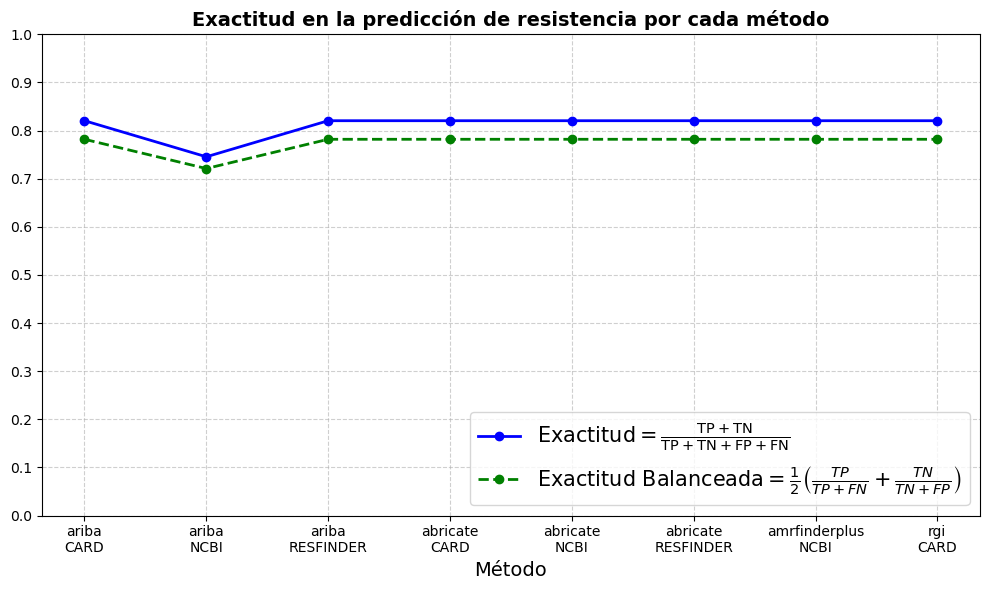

In [20]:
import matplotlib.pyplot as plt

desired_order = ['ariba_CARD', 'ariba_NCBI', 'ariba_RESFINDER', 
                 'abricate_CARD', 'abricate_NCBI', 'abricate_RESFINDER', 
                 'amrfinderplus_NCBI', 'rgi_CARD']

# Reindex the DataFrame to match the desired order
smol = smol.reindex(desired_order)
# Plotting
plt.figure(figsize=(10, 6))

# Plot Accuracy
accuracy_formula = r'$\text{Exactitud} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}$'
plt.plot(smol.index, smol['Accuracy'], marker='o', label=accuracy_formula, color='blue', linestyle='-', linewidth=2)

# Plot Balanced Accuracy
balanced_accuracy_formula = r'$\text{Exactitud Balanceada} = \frac{1}{2} \left(\frac{TP}{TP + FN} + \frac{TN}{TN + FP}\right)$'
plt.plot(smol.index, smol['Balanced_Accuracy'], marker='o', label=balanced_accuracy_formula, color='green', linestyle='--', linewidth=2)






# Customization
plt.title('Exactitud en la predicción de resistencia por cada método', fontsize=14, fontweight='bold')
plt.xlabel('Método', fontsize=14)
plt.ylim([smol[['Accuracy', 'Balanced_Accuracy']].min().min() - 0.05, smol[['Accuracy', 'Balanced_Accuracy']].max().max() + 0.05])  # Adjust y-axis based on data range
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim([0, 1])

# gridlines at every 0.1 from 0-1
plt.yticks([i/10 for i in range(11)])

# Edit x-axis label strings replace _ by ' '
plt.xticks(ticks=range(len(smol.index)), labels=[tool.replace('_', '\n') for tool in smol.index])

# Add a legend
plt.legend(loc='lower right', fontsize=15)

# Display the plot
plt.tight_layout()


# Save the plot
import datetime
now = datetime.datetime.now().strftime("%Y%m%d")
plt.savefig(f'output_dir/{now}_accuracy_plot.png', dpi=800, bbox_inches='tight')
plt.savefig(f'output_dir/{now}_accuracy_plot.svg', dpi=800, bbox_inches='tight')

plt.show()

/tmp/ipykernel_2339/1944143738.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  smol['TP'][i] / 2,
/tmp/ipykernel_2339/1944143738.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"{smol['TP'][i]/total_first_row*100:.2f}%",
/tmp/ipykernel_2339/1944143738.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  smol['TP'][i] + smol['TN'][i] / 2,
/tmp/ipykernel_2339/1944143738.py:34: FutureWarning: Series.__getitem__ treating keys

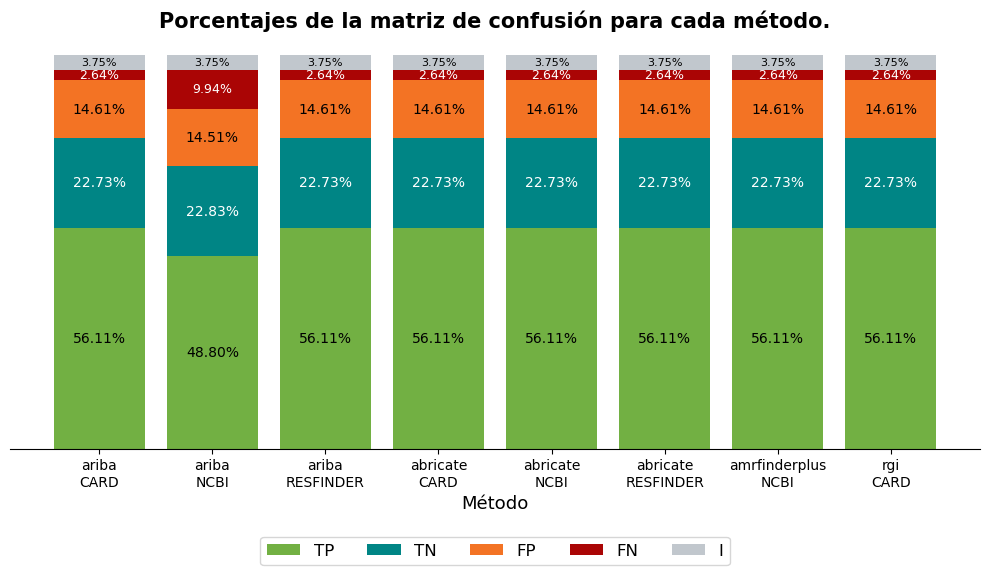

In [21]:
# Now a stacked bar plot with the TP, TN, FP, FN and I values for each tool
plt.figure(figsize=(10, 6))

# Plotting
plt.bar(smol.index, smol['TP'], label='TP', color='#72b043')
plt.bar(smol.index, smol['TN'], label='TN', color='#008585', bottom=smol['TP'])
plt.bar(smol.index, smol['FP'], label='FP', color='#f37324', bottom=smol['TP'] + smol['TN'])
plt.bar(smol.index, smol['FN'], label='FN', color='#aa0505', bottom=smol['TP'] + smol['TN'] + smol['FP'])
plt.bar(smol.index, smol['I'], label='I', color='#c1c7cd', bottom=smol['TP'] + smol['TN'] + smol['FP'] + smol['FN'])

# Customization
plt.title('Porcentajes de la matriz de confusión para cada método.', fontsize=15, fontweight='bold')
plt.xlabel('Método', fontsize=13)
plt.xticks(ticks=range(len(smol.index)), labels=[tool.replace('_', '\n') for tool in smol.index])
plt.legend(loc='lower center', fontsize=12, bbox_to_anchor=(0.5, -0.3), ncol=5)

# Get total to calculate percentages
total_first_row = smol.iloc[0].sum()

# Adding the counts on top of the bars
for i in range(len(smol.index)):
    # TP
    plt.text(i, 
             smol['TP'][i] / 2, 
             f"{smol['TP'][i]/total_first_row*100:.2f}%", 
             ha='center', 
             va='center', 
             color='black', 
             fontsize=10)
    # TN
    plt.text(i, 
             smol['TP'][i] + smol['TN'][i] / 2, 
             f"{smol['TN'][i]/total_first_row*100:.2f}%", 
             ha='center', 
             va='center', 
             color='white', 
             fontsize=10)
    # FP
    plt.text(i, 
             smol['TP'][i] + smol['TN'][i] + smol['FP'][i] / 2, 
             f"{smol['FP'][i]/total_first_row*100:.2f}%", 
             ha='center', 
             va='center', 
             color='black', 
             fontsize=10)
    # FN
    plt.text(i, 
             smol['TP'][i] + smol['TN'][i] + smol['FP'][i] + smol['FN'][i] / 2, 
             f"{smol['FN'][i]/total_first_row*100:.2f}%", 
             ha='center', 
             va='center', 
             color='white', 
             fontsize=9)
    # I
    plt.text(i, 
             smol['TP'][i] + smol['TN'][i] + smol['FP'][i] + smol['FN'][i] + smol['I'][i] / 2, 
             f"{smol['I'][i]/total_first_row*100:.2f}%", 
             ha='center', 
             va='center', 
             color='black', 
             fontsize=8)

# hide Y axis
plt.yticks([])

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Display the plot
plt.tight_layout()

# Save the plot
plt.savefig(f'output_dir/{now}_confusion_matrix_plot.png', dpi=800, bbox_inches='tight')
plt.savefig(f'output_dir/{now}_confusion_matrix_plot.svg', dpi=800, bbox_inches='tight')

plt.show()